In [1]:
%pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import random
from tensorflow import keras
from keras import layers
# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential

In [4]:
import pathlib

data_dir = pathlib.Path("E:/tcc/base1/data/")

image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

18372


In [32]:
batch_size = 32
img_height = 128
img_width = 128

In [33]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 18372 files belonging to 2 classes.
Using 14698 files for training.


In [34]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 18372 files belonging to 2 classes.
Using 3674 files for validation.


In [35]:
class_names = train_ds.class_names
print(class_names)

['apnea', 'normal']


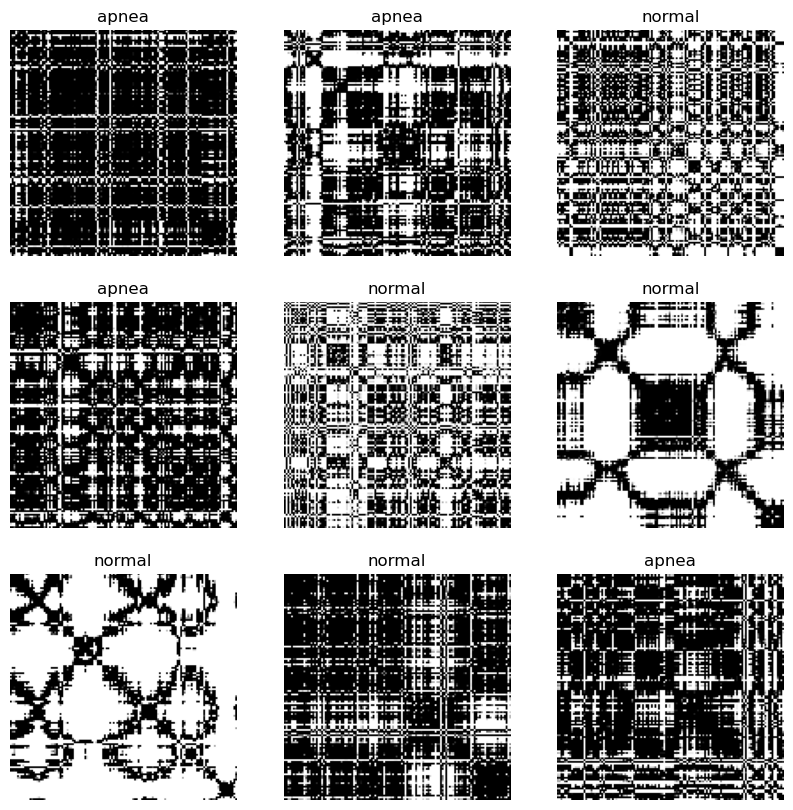

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [37]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [38]:
normalization_layer = keras.layers.Rescaling(1./255)

In [39]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [40]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomZoom(0.1),
  ]
)

In [41]:
from keras import layers
random.seed(42)

num_classes = len(class_names)
model = keras.models.Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [42]:
from keras import layers


num_classes = len(class_names)

random.seed(42)

model2 = keras.models.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [43]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 rescaling_5 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                 

In [45]:
epochs=50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
460/460 [==============================] - 115s 246ms/step - loss: 0.6933 - accuracy: 0.5356 - val_loss: 0.6873 - val_accuracy: 0.5626
Epoch 2/50
460/460 [==============================] - 69s 150ms/step - loss: 0.6826 - accuracy: 0.5666 - val_loss: 0.6864 - val_accuracy: 0.5490
Epoch 3/50
460/460 [==============================] - 67s 145ms/step - loss: 0.6795 - accuracy: 0.5706 - val_loss: 0.6882 - val_accuracy: 0.5550
Epoch 4/50
460/460 [==============================] - 67s 146ms/step - loss: 0.6782 - accuracy: 0.5720 - val_loss: 0.6911 - val_accuracy: 0.5512
Epoch 5/50
460/460 [==============================] - 68s 148ms/step - loss: 0.6761 - accuracy: 0.5755 - val_loss: 0.6863 - val_accuracy: 0.5484
Epoch 6/50
460/460 [==============================] - 67s 147ms/step - loss: 0.6737 - accuracy: 0.5801 - val_loss: 0.6894 - val_accuracy: 0.5593
Epoch 7/50
460/460 [==============================] - 67s 146ms/step - loss: 0.6704 - accuracy: 0.5845 - val_loss: 0.7367 - val_a

KeyboardInterrupt: 

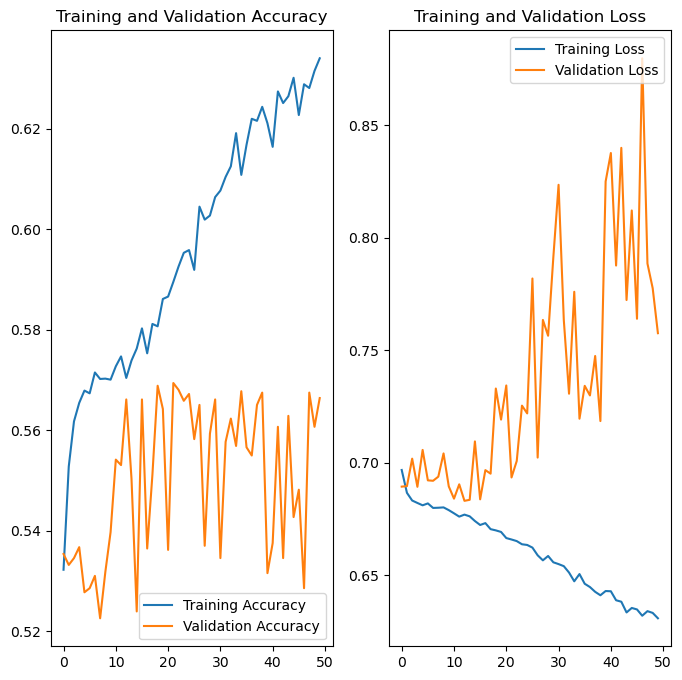

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()